In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt 

# import functions and classes from Sklearn.py
import sys

sys.path.append('../../full-stack-data-scientist/ch5_python/python_appendix')  

In [168]:
os.chdir('/Users/rachelzeng/full-stack-data-scientist/ch6_ml/Random_Forest')

In [169]:
import os 

print(sys.path)
from Sklearn_tutorial import data_loader, target_transformation, Attribute_pip

import pandas as pd
os.chdir('../../ch6_ml')
Data_Path =os.path.join ('Data')
data_name = 'COVID_19.csv'
COVID = data_loader (data_path=Data_Path, data= data_name)


['/Users/rachelzeng/full-stack-data-scientist/ch6_ml/Random_Forest', '/Users/rachelzeng/.vscode/extensions/ms-python.python-2020.8.109390/pythonFiles/vscode_datascience_helpers/../.does-not-exist', '/Users/rachelzeng/.vscode/extensions/ms-python.python-2020.8.109390/pythonFiles', '/Users/rachelzeng/.vscode/extensions/ms-python.python-2020.8.109390/pythonFiles/lib/python', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/rachelzeng/Library/Python/3.6/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/extensions', '/Users/rachelzeng/.ipython', '/Users/rachelzeng/full-stack-data-scientist/ch5_python/python_appendix', '/Users/rachelzeng/full-stack-data-scientist/ch5_python

In [170]:
COVID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
ID                  200 non-null int64
Age                 200 non-null int64
Sex                 200 non-null object
Residency Status    200 non-null object
Travel?             199 non-null object
Close contact       199 non-null object
Dry Cough           199 non-null object
Temperature         199 non-null object
COVID_19?           200 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 12.8+ KB


In [171]:
COVID['Temperature']= pd.to_numeric(COVID.Temperature, errors='coerce')

In [172]:
print(COVID.head())

ID  Age Sex Residency Status Travel? Close contact Dry Cough  Temperature  \
0   1   44   M     Non-Canadian    True          True     False    37.464557   
1   2   16   M     Non-Canadian    True          True      True    39.282884   
2   3   36   M         Canadian    True         False      True    35.839426   
3   4   53   F     Non-Canadian   False          True      True    38.117380   
4   5   11   F         Canadian   False         False      True    36.933678   

   COVID_19?  
0       True  
1       True  
2      False  
3       True  
4      False  


In [173]:

target_name = 'COVID_19?'
Irrelavent = COVID.pop ('ID')
target = COVID.pop (target_name)

COVID[['Travel?', 'Close contact', 'Dry Cough']] = COVID[['Travel?', 'Close contact', 'Dry Cough']].astype('bool')

COVID[['Residency Status',  'Sex']] = COVID[['Residency Status', 'Sex']].astype('category')


In [174]:
# Split Training and Testing data
from sklearn.model_selection import train_test_split

Train_Data, Test_Data, target_train, target_test  = train_test_split(COVID,target,test_size=0.2, random_state= 1,stratify=target)
Train_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 18 to 90
Data columns (total 7 columns):
Age                 160 non-null int64
Sex                 160 non-null category
Residency Status    160 non-null category
Travel?             160 non-null bool
Close contact       160 non-null bool
Dry Cough           160 non-null bool
Temperature         158 non-null float64
dtypes: bool(3), category(2), float64(1), int64(1)
memory usage: 4.7 KB


In [175]:
# Preprocessing 
# Get rid of the null values
null_train = Train_Data.loc[pd.isnull(Train_Data).any(axis = 1),:].index.values
Train_Data = Train_Data.drop(null_train)
null_test = Test_Data.loc[pd.isnull(Test_Data).any(axis = 1),:].index.values
Test_Data = Test_Data.drop(null_test)
target_train= target_train.drop(null_train)
target_test = target_test.drop(null_test)


In [176]:
print(Test_Data.head())
print(Train_Data.info())

Age Sex Residency Status  Travel?  Close contact  Dry Cough  Temperature
37   65   M     Non-Canadian     True          False      False    37.068704
85    7   M     Non-Canadian     True          False      False    38.679587
56   67   M         Canadian     True          False      False    39.854297
10   49   M         Canadian    False          False       True    38.011909
33   31   F         Canadian    False          False      False    37.651582
<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 18 to 90
Data columns (total 7 columns):
Age                 158 non-null int64
Sex                 158 non-null category
Residency Status    158 non-null category
Travel?             158 non-null bool
Close contact       158 non-null bool
Dry Cough           158 non-null bool
Temperature         158 non-null float64
dtypes: bool(3), category(2), float64(1), int64(1)
memory usage: 4.7 KB
None


In [177]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


Trained_transformed = Attribute_pip (Train_Data)
Tested_transformed = Attribute_pip (Test_Data)

target_train = target_transformation (target_train)
target_test = target_transformation (target_test)
print(target_train)


[0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1
 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1
 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 1 1 0 0 0 0 1 0]


In [178]:
list(Train_Data.select_dtypes(include=['number']).columns)

['Age', 'Temperature']

In [179]:
col_name = ['Age','Temperature', 'Sex-M', 'Sex-F', 'Residency Status-C ','Residency Status-NC', 'Travel Y', 'Travel N', 'Close contact Y', 'Close contact N' ,'Dry Cough-Y','Dry Cough- N']

In [180]:

# Decision Tree 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
Single_tree = DecisionTreeClassifier(criterion = 'entropy',random_state= 1).fit(Trained_transformed,target_train)
print(Single_tree)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [181]:

from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
predict = Single_tree.predict(Tested_transformed)
print('precision_ Score on the test data: {0:.2f} %'.format(100 *((precision_score)(y_true= target_test, y_pred=predict))))
print(classification_report(target_test, predict))


precision_ Score on the test data: 73.68 %
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        19
           1       0.74      0.67      0.70        21

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40



'COVID_19_DT_py.png'

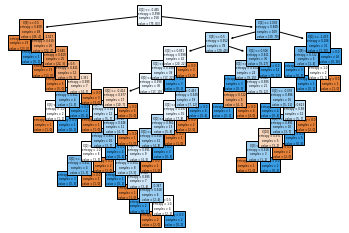

In [182]:

tree.plot_tree(Single_tree, filled= True)
os.chdir('/Users/rachelzeng/dsbook/fig')
import graphviz # pip install graphviz (brew install graphviz on MAC solves the problem of system path)
graph_data = tree.export_graphviz(Single_tree, out_file=None, 
                    feature_names=col_name, 
                     class_names=['infected', 'noninfected'] ,
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(graph_data) 
graph.format = 'png'
graph.render("COVID_19_DT_py", view = 'True') 


In [183]:
# Feature Importantce
print(*zip(col_name ,Single_tree.feature_importances_))

('Age', 0.22038545664830167) ('Temperature', 0.5772269055665841) ('Sex-M', 0.017468315042589083) ('Sex-F', 0.030150005332207703) ('Residency Status-C ', 0.04336339475772142) ('Residency Status-NC', 0.012681690289618623) ('Travel Y', 0.030783236813487994) ('Travel N', 0.0) ('Close contact Y', 0.010206480987221211) ('Close contact N', 0.0444195927913694) ('Dry Cough-Y', 0.01331492177089892) ('Dry Cough- N', 0.0)


In [184]:

from sklearn.metrics import accuracy_score
predict_train = Single_tree.predict(Trained_transformed)
print('accuracy_ Score on the train data: {0:.2f} %'.format(100 *((accuracy_score)(y_true= target_train, y_pred=predict_train ))))

predict_test = Single_tree.predict(Tested_transformed)
print('accuracy_ Score on the test data: {0:.2f} %'.format(100 *((accuracy_score)(y_true= target_test, y_pred=predict_test ))))



accuracy_ Score on the train data: 100.00 %
accuracy_ Score on the test data: 70.00 %


accuracy_ Score of pre-pruned Tree on the test data: 80.00 %


'COVID_19_DTpruned_py.png'

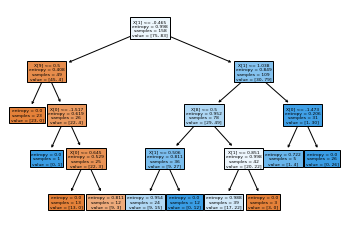

In [185]:

# Pre-pruning
Single_tree_pruned = DecisionTreeClassifier(criterion = 'entropy', random_state= 1, min_samples_split=15, max_depth=4).fit(Trained_transformed,target_train)
score_prun = Single_tree_pruned.score(Tested_transformed,target_test )
print('accuracy_ Score of pre-pruned Tree on the test data: {0:.2f} %'.format(100 *score_prun))

# New graph:
tree.plot_tree(Single_tree_pruned, filled= True)

graph_data = tree.export_graphviz(Single_tree_pruned, out_file=None, 
                    feature_names=col_name, 
                     class_names=['infected', 'noninfected'] ,
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(graph_data) 
graph.format = 'png'
graph.render("COVID_19_DTpruned_py", view=True) 

In [186]:
print(*zip(col_name ,Single_tree_pruned.feature_importances_))

('Age', 0.1101342316234808) ('Temperature', 0.8053829671479474) ('Sex-M', 0.0) ('Sex-F', 0.0) ('Residency Status-C ', 0.0) ('Residency Status-NC', 0.0) ('Travel Y', 0.0) ('Travel N', 0.0) ('Close contact Y', 0.03764901550104075) ('Close contact N', 0.04683378572753097) ('Dry Cough-Y', 0.0) ('Dry Cough- N', 0.0)


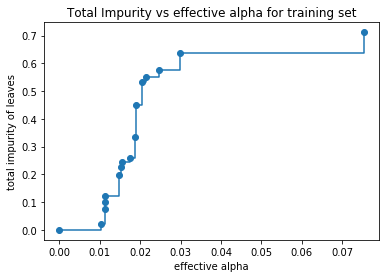

Number of nodes in the last tree is: 1 with ccp_alpha: 0.28603541879587546
[0.7, 0.7, 0.7, 0.675, 0.675, 0.675, 0.65, 0.65, 0.65, 0.7, 0.8, 0.8, 0.775, 0.775, 0.775, 0.775]


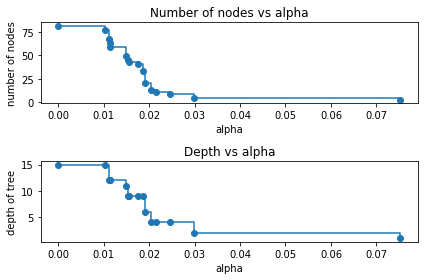

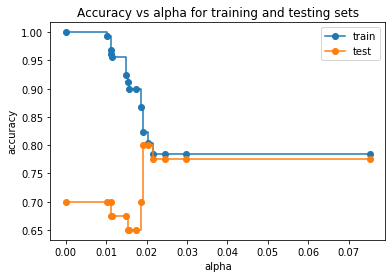

In [187]:
# Post pruning 
prune_path = Single_tree.cost_complexity_pruning_path(Trained_transformed, target_train)
ccp_alphas, impurities = prune_path.ccp_alphas, prune_path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

plt.show()

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy',random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(Trained_transformed, target_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(Trained_transformed, target_train) for clf in clfs]
test_scores = [clf.score(Tested_transformed, target_test) for clf in clfs]
print(test_scores)

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

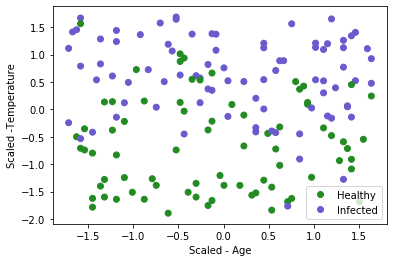

In [188]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

classes = ['Healthy','Infected']
colors = [ 'forestgreen','slateblue']
scatter = plt.scatter(Trained_transformed[:,0], Trained_transformed[:,1], c= target_train, cmap = mcolors.ListedColormap(colors))
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel('Scaled - Age')
plt.ylabel('Scaled -Temperature')
plt.show()

In [189]:
A_tree = DecisionTreeClassifier(criterion = 'entropy',random_state= 1).fit(Trained_transformed[:,[1,2]],target_train)
tree_prediction = A_tree.predict(Tested_transformed[:,[1,2]])


In [190]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf =  BaggingClassifier(DecisionTreeClassifier(), n_estimators= 300, max_samples= 0.8, bootstrap= True, n_jobs = -1 , random_state=12)
bag_classifier = bag_clf.fit(Trained_transformed[:,[1,2]], target_train )
ensemble_prediction = bag_classifier.predict(Tested_transformed[:,[1,2]])
print(accuracy_score(target_test, tree_prediction))
print(accuracy_score(target_test, ensemble_prediction))


0.7
0.725


In [191]:
# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(n_estimators= 300, max_leaf_nodes=20, n_jobs=-1 ,random_state=12)
forest_classifier = rand_clf.fit(Trained_transformed, target_train )
ensemble_prediction_forest = forest_classifier.predict(Tested_transformed)
accuracy_score(target_test, ensemble_prediction_forest)

0.75